# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from brian2 import *
from brian2tools import brian_plot, plot_state

from TacNet import TacNet


set_device('cpp_standalone')

# Test TacNet - tactile encoding spiking network

In [2]:
dt = 1*ms

# Load dataset
dataset = np.load("../data/touch.pkl", allow_pickle=True)
sensordata = dataset['round_site']['sensordata']
orientations = dataset['round_site']['orientations']
data = np.asarray(sensordata)

# Convert values to spikes
inputs = data.reshape(data.shape[0], -1)
inputs[inputs > 0] = 1.
I = TimedArray(inputs*200*pA, dt=dt)
if 'initiated' in locals():
    device.reinit()
    device.activate()
else:
    initiated = True

duration = I.values.shape[0]*dt
num_neurons = [225, 15, 36]
model = TacNet(num_neurons)
mons = model.run(I, duration, clean=True)

# Plot results
fig, axs = plt.subplots(7, 1, figsize=(20, 21))
for i in range(3):
    axs[i].set_title('Spike L'+str(i+1))
    brian_plot(mons['SpikeMonitor_L'+str(i+1)], axes=axs[i])

axs[3].set_title('L3 Membrane Potential')
plot_state(mons['StateMonitor_L3'].t, mons['StateMonitor_L3'].v.T, axes=axs[3])
axs[4].set_title('Syn23 X')
plot_state(mons['StateMonitor_Syn23'].t,
            mons['StateMonitor_Syn23'].X.T, axes=axs[4])
axs[5].set_title('Syn12 Connectivity')
brian_plot(model.synapses['Syn12'], axes=axs[5])
axs[6].set_title('Syn23 Final X')
axs[6].set_xlabel('target neuron index')
axs[6].set_ylabel('source neuron index')
axs[6].imshow(model.synapses['Syn23'].X_[:].reshape(
    (num_neurons[1], num_neurons[2])))
plt.tight_layout()
plt.show()


/home/alex/miniconda3/envs/tac3d/bin/x86_64-conda-linux-gnu-c++ -c -Wno-write-strings -Ibrianlib/randomkit -I/home/alex/miniconda3/envs/tac3d/include -w -O3 -ffast-math -fno-finite-math-only -march=native -std=c++11 -I.   -MM brianlib/randomkit/randomkit.c code_objects/L1_group_variable_set_conditional_codeobject.cpp code_objects/L1_resetter_codeobject.cpp code_objects/L1_stateupdater_codeobject.cpp code_objects/L1_thresholder_codeobject.cpp code_objects/L2_group_variable_set_conditional_codeobject.cpp code_objects/L2_resetter_codeobject.cpp code_objects/L2_stateupdater_codeobject.cpp code_objects/L2_thresholder_codeobject.cpp code_objects/L3_group_variable_set_conditional_codeobject.cpp code_objects/L3_group_variable_set_conditional_codeobject_1.cpp code_objects/L3_resetter_1_codeobject.cpp code_objects/L3_resetter_codeobject.cpp code_objects/L3_stateupdater_codeobject.cpp code_objects/L3_thresholder_1_codeobject.cpp code_objects/L3_thresholder_codeobject.cpp code_objects/SpikeMonitor

/home/alex/miniconda3/envs/tac3d/bin/../lib/gcc/x86_64-conda-linux-gnu/10.4.0/../../../../x86_64-conda-linux-gnu/bin/ld: /home/alex/miniconda3/envs/tac3d/lib/libstdc++.so: undefined reference to `memcpy@GLIBC_2.14'
/home/alex/miniconda3/envs/tac3d/bin/../lib/gcc/x86_64-conda-linux-gnu/10.4.0/../../../../x86_64-conda-linux-gnu/bin/ld: /home/alex/miniconda3/envs/tac3d/lib/libstdc++.so: undefined reference to `aligned_alloc@GLIBC_2.16'
/home/alex/miniconda3/envs/tac3d/bin/../lib/gcc/x86_64-conda-linux-gnu/10.4.0/../../../../x86_64-conda-linux-gnu/bin/ld: /home/alex/miniconda3/envs/tac3d/lib/libstdc++.so: undefined reference to `clock_gettime@GLIBC_2.17'
collect2: error: ld returned 1 exit status
make: *** [makefile:17: main] Error 1


RuntimeError: Project compilation failed (error code: 512). Consider running with "clean=True" to force a complete rebuild.

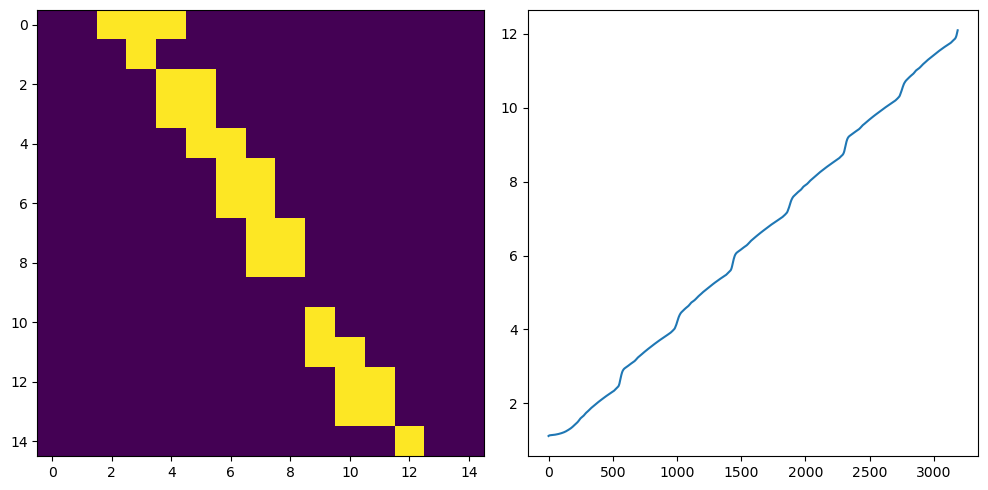

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data[1000, :, :])
axs[1].plot(orientations)
plt.tight_layout()
plt.show()

# Reference
1. F. Pascal, L. Bombrun, J. -Y. Tourneret and Y. Berthoumieu, "Parameter Estimation For Multivariate Generalized Gaussian Distributions," in IEEE Transactions on Signal Processing, vol. 61, no. 23, pp. 5960-5971, Dec.1, 2013, doi: 10.1109/TSP.2013.2282909.
2. A. Parvizi-Fard, M. Amiri, D. Kumar, M. M. Iskarous, and N. V. Thakor, “A functional spiking neuronal network for tactile sensing pathway to process edge orientation,” Sci Rep, vol. 11, no. 1, p. 1320, Dec. 2021, doi: 10.1038/s41598-020-80132-4.
3. J. A. Pruszynski and R. S. Johansson, “Edge-orientation processing in first-order tactile neurons,” Nat Neurosci, vol. 17, no. 10, pp. 1404–1409, Oct. 2014, doi: 10.1038/nn.3804.
4. J. M. Yau, S. S. Kim, P. H. Thakur, and S. J. Bensmaia, “Feeling form: the neural basis of haptic shape perception,” Journal of Neurophysiology, vol. 115, no. 2, pp. 631–642, Feb. 2016, doi: 10.1152/jn.00598.2015.
5. G. Sutanto, Z. Su, S. Schaal, and F. Meier, “Learning Sensor Feedback Models from Demonstrations via Phase-Modulated Neural Networks,” in 2018 IEEE International Conference on Robotics and Automation (ICRA), Brisbane, QLD, May 2018, pp. 1142–1149. doi: 10.1109/ICRA.2018.8460986.